In [1]:
import numpy as np
from filterpy.kalman import EnsembleKalmanFilter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import time
from enkf import *

## Harmonic oscillator


In [2]:
w=2
x = np.array([2,0])
Pe = 2*np.pi/w
dt= Pe/20
T = 3*Pe
N = int(round(T/dt))
def fx_rk4(x,t, dt,w):
        def f(t,X_n,w):
            (u,v)=X_n
            f_1 = v
            f_2 =-w**2*u
            return np.array([f_1,f_2])
        K1=f(t, x,w)
        K2=f(t+dt/2., x + 1./2. * K1 * dt,w)
        K3=f(t+dt/2., x + 1./2. * K2 * dt,w)
        K4=f(t, x+ K3 * dt,w)
        X_next=x+ dt/6.* (K1+2.*K2+2.*K3+K4)
        return X_next
def fx_euler(x,t, dt,w):
        def f(t,X_n,w): 
            (u,v)=X_n
            f_1 = v
            f_2 =-w**2*u
            return np.array([f_1,f_2])
        V=f(dt,x,w)
        X_next=[x[0]+V[0]*dt,x[1]+V[1]*dt]
        return X_next
oscillateur=RK4_harmonique(w,x,N,T)
oscillateur2=euler_explicit_harmonique(w,x,N,T)

In [3]:
def hx(x):
       return  np.array([x[0]])
P = np.eye(2) * 0.01
R = np.eye(1)*0.001 # matrice de cov associer a la mesure
Q=np.eye(2)*0.01

def read_sensor(t):
        2*np.cos(2*t)

In [4]:
tab_model,tab_temps_model,tab_cov_model=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_rk4,w)
tab_etat,tab_temps_2,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_euler,w)


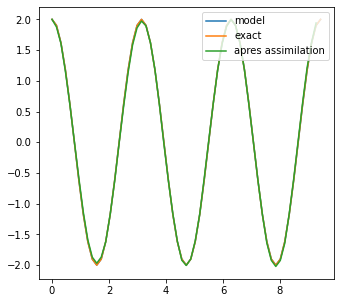

In [5]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur[2],oscillateur[0],label='model')
ax1.plot(oscillateur[2], 2*np.cos(w*oscillateur[2]),label='exact')
ax1.plot(tab_temps_model,tab_model[:,0],label='apres assimilation')
ax1.legend(loc='upper right')



In [6]:
P = np.eye(2) * 0.0
R = np.eye(1)*0.001 # matrice de cov associer a la mesure
Q=np.eye(2)*0.0

tab_model,tab_temps_model,tab_cov_model=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_rk4,w)




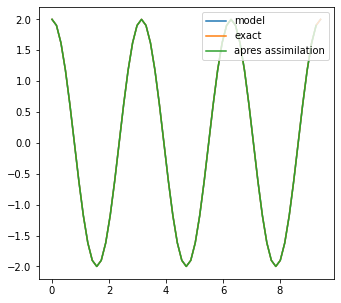

In [7]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur[2],oscillateur[0],label='model')
ax1.plot(oscillateur[2], 2*np.cos(w*oscillateur[2]),label='exact')
ax1.plot(tab_temps_model,tab_model[:,0],label='apres assimilation')
ax1.legend(loc='upper right')

In [8]:
P = np.eye(2) * 0.1
R = np.eye(1)*0.001 
Q=np.eye(2)*0.1
tab_etat,tab_temps_2,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_euler,w)

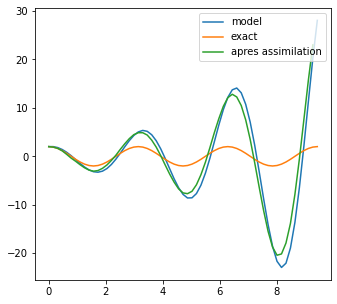

In [9]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur2[2],oscillateur2[0],label='model')
ax1.plot(oscillateur2[2], 2*np.cos(w*oscillateur2[2]),label='exact')
ax1.plot(tab_temps_2,tab_etat[:,0],label='apres assimilation')
ax1.legend(loc='upper right')

## Data assimilation with the Lorenz System

In [10]:
γ=(12.,6.,12.) #(σ,b,r)
X0=(-10.,-10.,25.) #(x0,y0,z0)
T=1
N=int(T/0.01)


In [11]:
lorenz1=RK4_Lorenz(γ,X0,N,T)
print(lorenz1)

(array([-10.        ,  -9.92065947,  -9.70125731,  -9.36936858,
        -8.95140944,  -8.47188334,  -7.95279099,  -7.41324555,
        -6.8692982 ,  -6.33395188,  -5.81732439,  -5.32691601,
        -4.86793878,  -4.44367079,  -4.05580783,  -3.70479299,
        -3.39011249,  -3.11055206,  -2.8644125 ,  -2.64968592,
        -2.46419625,  -2.30570804,  -2.17200843,  -2.06096656,
        -1.97057484,  -1.89897556,  -1.84447631,  -1.80555675,
        -1.780869  ,  -1.76923357,  -1.76963211,  -1.78119824,
        -1.80320728,  -1.83506538,  -1.87629879,  -1.92654326,
        -1.98553403,  -2.05309636,  -2.12913675,  -2.21363472,
        -2.30663528,  -2.40824182,  -2.51860939,  -2.63793832,
        -2.76646786,  -2.90446988,  -3.05224225,  -3.2101019 ,
        -3.37837719,  -3.55739946,  -3.74749354,  -3.94896686,
        -4.16209703,  -4.3871176 ,  -4.6242017 ,  -4.87344342,
        -5.1348367 ,  -5.4082517 ,  -5.69340859,  -5.98984906,
        -6.29690579,  -6.6136707 ,  -6.93896284,  -7.2

In [12]:

N=int(T/0.1)


In [13]:
lorenz2=RK4_Lorenz(γ,X0,N,T)
print(lorenz2)

(array([-10.        ,  -6.017     ,  -2.53725935,  -1.89851002,
        -2.44436736,  -3.91529905,  -6.51296524,  -9.75385504,
       -11.01920522,  -9.08568016,  -6.76900994]), array([-10.        ,  -1.78621533,  -1.14115502,  -1.90216439,
        -3.24768273,  -5.58910094,  -9.14577545, -12.15777719,
       -10.57519094,  -6.77958936,  -5.45855351]), array([25.        , 16.74395333,  9.54438723,  5.46595872,  3.41373458,
        2.95325982,  4.6318605 ,  9.48024805, 14.55820586, 14.38527267,
       11.30707921]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


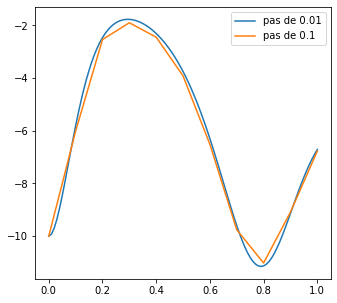

In [14]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz1[3],lorenz1[0],label="pas de 0.01")
ax1.plot(lorenz2[3],lorenz2[0],label="pas de 0.1")
ax1.legend()

In [15]:

γ=(12.,6.,12.)  #(σ,b,r)
N=10
T=1

x = np.array([-10.,-10.,25.])#(x0,y0,z0)
dt= N*0.01
P = np.eye(3) * 2.

# Test

In [16]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from copy import deepcopy
import numpy as np
from numpy import dot, zeros, eye, outer
from numpy.random import multivariate_normal
from filterpy.common import pretty_str


class EnsembleKalmanFilter2(object):
    def __init__(self, x, P, dim_z, dt, N, hx, fx):
        if dim_z <= 0:
            raise ValueError('dim_z must be greater than zero')

        if N <= 0:
            raise ValueError('N must be greater than zero')

        dim_x = len(x)
        self.dim_x = dim_x
        self.dim_z = dim_z
        self.dt = dt
        self.N = N
        self.hx = hx
        self.fx = fx
        self.K = np.zeros((dim_x, dim_z))
        self.z = np.array([[None]*self.dim_z]).T
        self.S = np.zeros((dim_z, dim_z))   # system uncertainty
        self.SI = np.zeros((dim_z, dim_z))  # inverse system uncertainty

        self.initialize(x, P)
        self.Q = eye(dim_x)       # process uncertainty
        self.R = eye(dim_z)       # state uncertainty
        self.inv = np.linalg.inv

        # used to create error terms centered at 0 mean for state and measurement
        self._mean = np.zeros(dim_x)
        self._mean_z = np.zeros(dim_z)

    def initialize(self, x, P):

        if x.ndim != 1:
            raise ValueError('x must be a 1D array')

        self.sigmas = multivariate_normal(mean=x, cov=P, size=self.N)
        self.x = x
        self.P = P

        # these will always be a copy of x,P after predict() is called
        self.x_prior = self.x.copy()
        self.P_prior = self.P.copy()

        # these will always be a copy of x,P after update() is called
        self.x_post = self.x.copy()
        self.P_post = self.P.copy()


    def update(self, z, R=None):
        if z is None:
            self.z = np.array([[None]*self.dim_z]).T
            self.x_post = self.x.copy()
            self.P_post = self.P.copy()
            return

        if R is None:
            R = self.R
        if np.isscalar(R):
            R = eye(self.dim_z) * R

        N = self.N
        dim_z = len(z)
        sigmas_h = zeros((N, dim_z))

        # transform sigma points into measurement space
        for i in range(N):
            sigmas_h[i] = self.hx(self.sigmas[i])
        print("sigma_h\n",sigmas_h)

        z_mean = np.mean(sigmas_h, axis=0)
        print("z_mean\n",z_mean)

        P_zz = 0
        for sigma in sigmas_h:
            s = sigma - z_mean
            P_zz += outer(s, s)
        P_zz = P_zz / (N-1) + R
        self.S = P_zz
        print("P_zz\n",P_zz)
        self.SI = self.inv(self.S)


        P_xz = 0
        for i in range(N):
            P_xz += outer(self.sigmas[i] - self.x, sigmas_h[i] - z_mean)
        P_xz /= N-1
        print("P_xz\n",P_xz)

        self.K = dot(P_xz, self.inv(P_zz))
        print("K\n",self.K)

        e_r = multivariate_normal(self._mean_z, R, N)
        for i in range(N):
            self.sigmas[i] += dot(self.K, z + e_r[i] - sigmas_h[i])

        self.x = np.mean(self.sigmas, axis=0)
        self.P = self.P - dot(dot(self.K, P_zz), self.K.T)

        # save measurement and posterior state
        self.z = deepcopy(z)
        self.x_post = self.x.copy()
        self.P_post = self.P.copy()


    def predict(self):
        N = self.N
        for i, s in enumerate(self.sigmas):
            self.sigmas[i] = self.fx(s, self.dt)
        e = multivariate_normal(self._mean, self.Q, N)
        
        self.sigmas += e

        P = 0
        for s in self.sigmas:
            sx = s - self.x
            P += outer(sx, sx)

        self.P = P / (N-1)
        # save prior
        self.x_prior = np.copy(self.x)
        self.P_prior = np.copy(self.P)
        print(self.x_prior )
        print(self.P_prior )


    def __repr__(self):
        return '\n'.join([
            'EnsembleKalmanFilter object',
            pretty_str('dim_x', self.dim_x),
            pretty_str('dim_z', self.dim_z),
            pretty_str('dt', self.dt),
            pretty_str('x', self.x),
            pretty_str('P', self.P),
            pretty_str('x_prior', self.x_prior),
            pretty_str('P_prior', self.P_prior),
            pretty_str('Q', self.Q),
            pretty_str('R', self.R),
            pretty_str('K', self.K),
            pretty_str('S', self.S),
            pretty_str('sigmas', self.sigmas),
            pretty_str('hx', self.hx),
            pretty_str('fx', self.fx)
            ])



In [17]:
def assimilation_donnée2(x,read_sensor,P,Q,R,T,dimz,dt,N,nb_echantillon,hx,fx,γ):
    f = EnsembleKalmanFilter2(x=x, P=P, dim_z=dimz, dt=dt, N=nb_echantillon,hx=hx, fx=lambda x,dt:fx(x,t,dt,γ))
    f.R = R # matrice de cov associer a la mesure
    f.Q =Q   #bruit blanc  centree en 0
    t=0
    index=N
    tab_etat=[]
    tab_temps=[]
    tab_cov=[]
    tab_etat.append(f.x)
    tab_temps.append(t)
    tab_cov.append(f.P_post.diagonal())
    while (t<(dt)):#
        z = read_sensor(index)
        f.predict()
        f.update(z)
        diag_cov=f.P_post.diagonal()
        tab_cov.append(diag_cov)
        index+=N
        t=t+dt
        tab_etat.append(f.x)
        tab_temps.append(t)
    return(np.array(tab_etat),np.array(tab_temps),np.array(tab_cov))






0.4
[-10. -10.  25.]
[[ 1.10670376e+06 -1.53810614e+06 -2.27934719e+07]
 [-1.53810614e+06  3.10793074e+06  3.12448067e+07]
 [-2.27934719e+07  3.12448067e+07  4.69975355e+08]]
sigma_h
 [[   998.48399306   -203.36049076 -21176.41112099]
 [   938.43356521  -1130.33006374 -19854.7966405 ]
 [   874.93940945  -2163.72313438 -18335.1144433 ]
 [   777.67208773  -1851.93951088 -15078.84434188]]
z_mean
 [   897.38226386  -1337.33829994 -18611.29163667]
P_zz
 [[    8913.65999155    67764.83700012  -246484.53550229]
 [   67764.83700012   758828.12848328 -1737411.55012188]
 [ -246484.53550229 -1737411.55012188  6893533.46633037]]
P_xz
 [[    8913.65899155    67764.83700012  -246484.53550229]
 [   67764.83700012   758828.12748328 -1737411.55012188]
 [ -246484.53550229 -1737411.55012188  6893533.46533036]]
K
 [[ 9.99162372e-01  1.47254778e-05 -2.62388004e-05]
 [ 1.47254298e-05  9.99999738e-01  4.60491221e-07]
 [-2.62395555e-05  4.60505518e-07  9.99999178e-01]]
[[15 15]
 [27 63]]


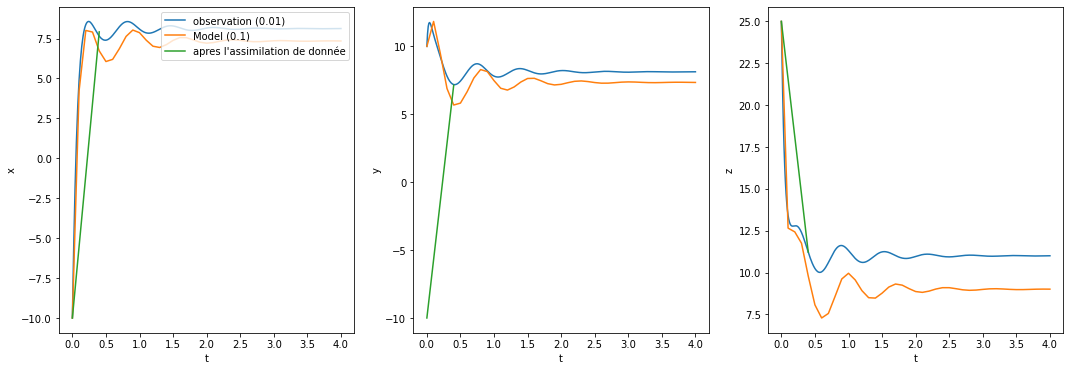

In [41]:
def hx_ex(x):
   return x

P=np.eye(3)*0.1
Q=np.eye(3)*0.1
R= np.eye(3)*0.001  
dt= N*0.01
print(dt)

def read_sensor_ex(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

tab_model,tab_temps_model,tab_cov_model=assimilation_donnée2(x,read_sensor_ex,P,Q,R,T,3,dt,N,4,hx_ex,fx,γ)
plot(lorenz1,lorenz2,tab_temps_model,tab_model)

a=np.array([[1,2],[6,3]])
b=np.array([[1,9],[7,3]])
print(dot(a,b))

# Fin test

### Assimilation only with the model

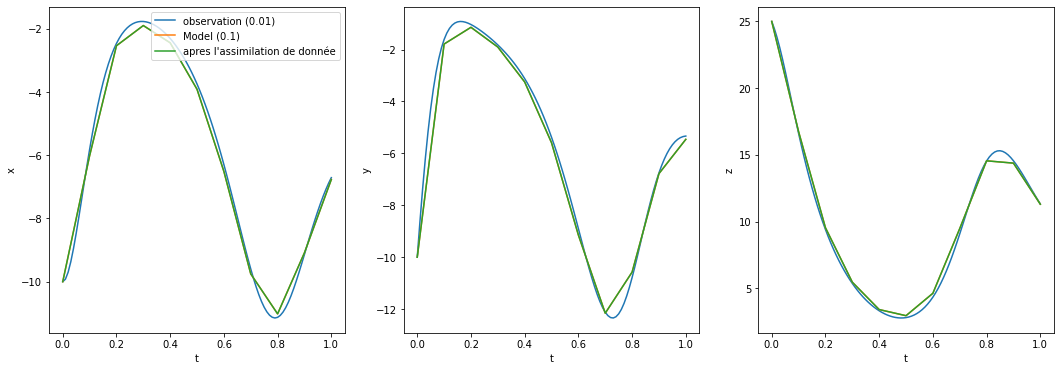

In [19]:
def hx_model(x):
   return x

R= np.eye(3)*0.001  
Q=np.zeros((3,3))
dt= N*0.01
P = np.eye(3)*0

def read_sensor_model(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

tab_model,tab_temps_model,tab_cov_model=assimilation_donnée(x,read_sensor_model,P,Q,R,T,3,dt,N,40,hx_model,fx,γ)
plot(lorenz1,lorenz2,tab_temps_model,tab_model)

### Observation of the 3 components x,y,z

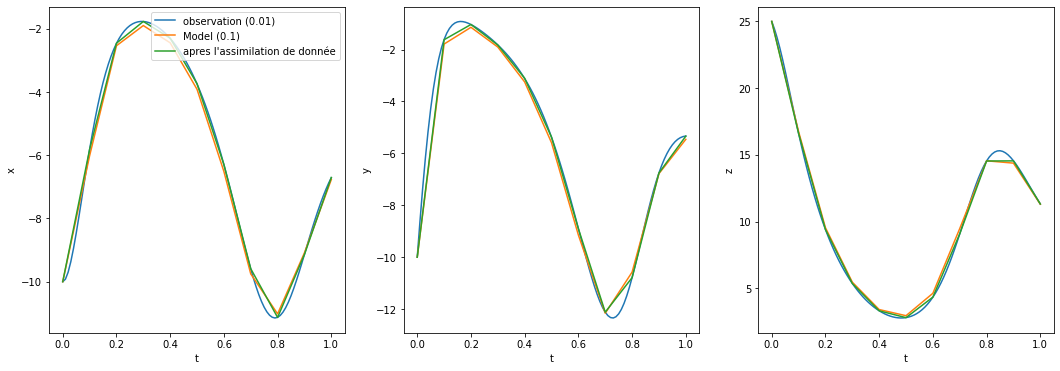

In [20]:
def hx(x):
   return x


P=np.eye(3)*0.1
Q=np.eye(3)*0.1
R= np.eye(3)*0.001  

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

### Observation only of the component x

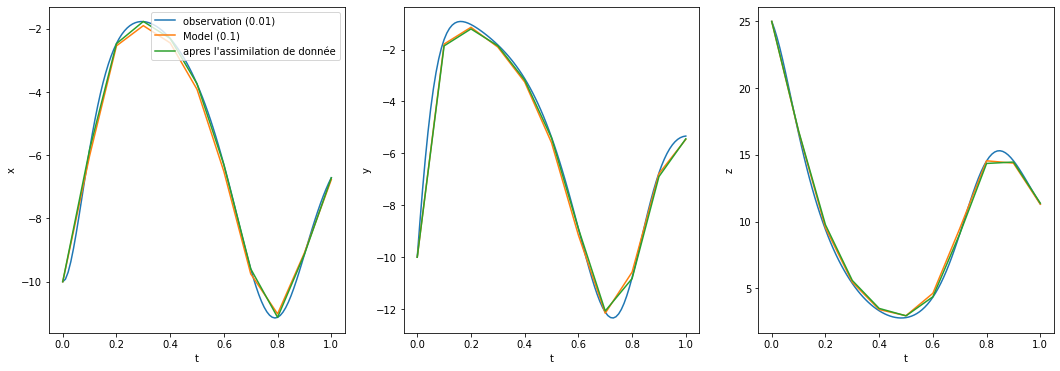

In [21]:
def hx_x(x):
   return np.array([x[0]])



R_x = np.eye(1)*0.001 

def read_sensor_x(index):
    return np.array([lorenz1[0][index]])



tab_x,tab_temps,tab_cov_x=assimilation_donnée(x,read_sensor_x,P,Q,R_x,T,1,dt,N,40,hx_x,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x)

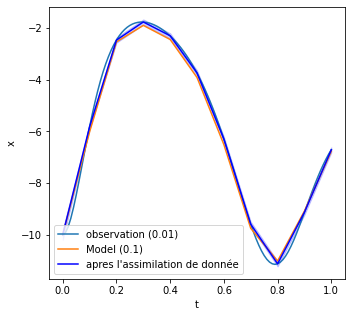

In [22]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x,0.1,tab_x,"t","x")

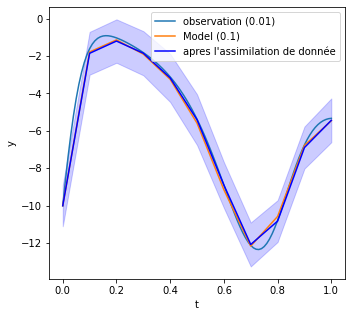

In [23]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x,1,tab_x,"t","y")

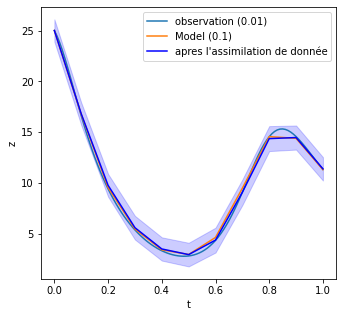

In [24]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x,1,tab_x,"t","z")

### Observation only of the components x,y

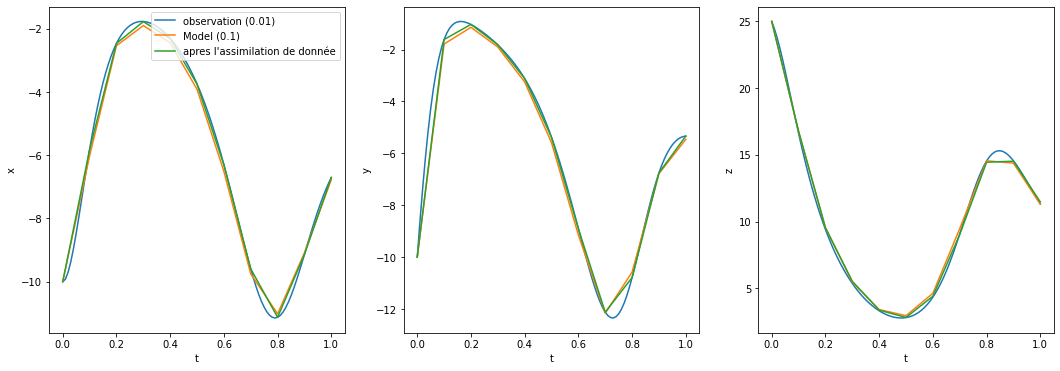

In [25]:
def hx_x_y(x):
   return np.array([x[0],x[1]])



R_x_y = np.eye(2)*0.001  

def read_sensor_x_y(index):
    return np.array([lorenz1[0][index],lorenz1[1][index]])



tab_x_y,tab_temps,tab_cov_x_y=assimilation_donnée(x,read_sensor_x_y,P,Q,R_x_y,T,2,dt,N,40,hx_x_y,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x_y)



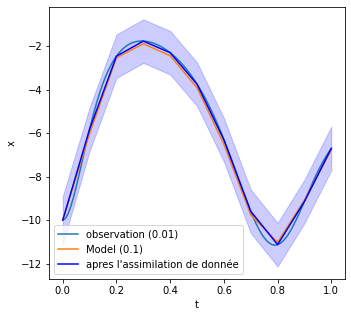

In [26]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x_y,1,tab_x_y,"t","x")

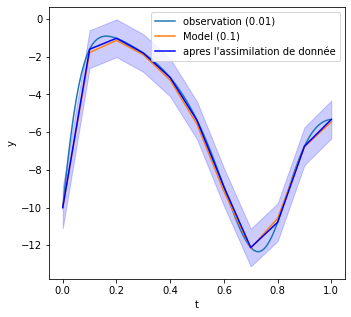

In [27]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x_y,1,tab_x_y,"t","y")

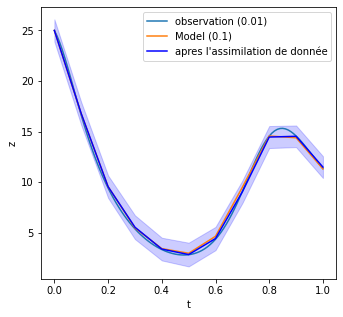

In [28]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x_y,1,tab_x_y,"t","z")

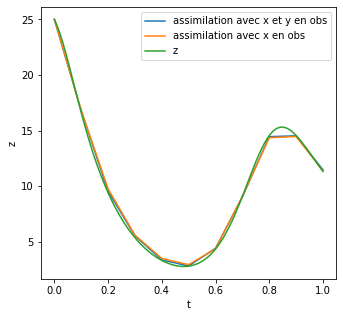

In [29]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(tab_temps,tab_x_y[:,2],label="assimilation avec x et y en obs")
ax1.plot(tab_temps,tab_x[:,2],label="assimilation avec x en obs")
ax1.plot(lorenz1[3],lorenz1[2],label="z")
plt.xlabel("t")
plt.ylabel("z")

ax1.legend()

### Observation only of the component z

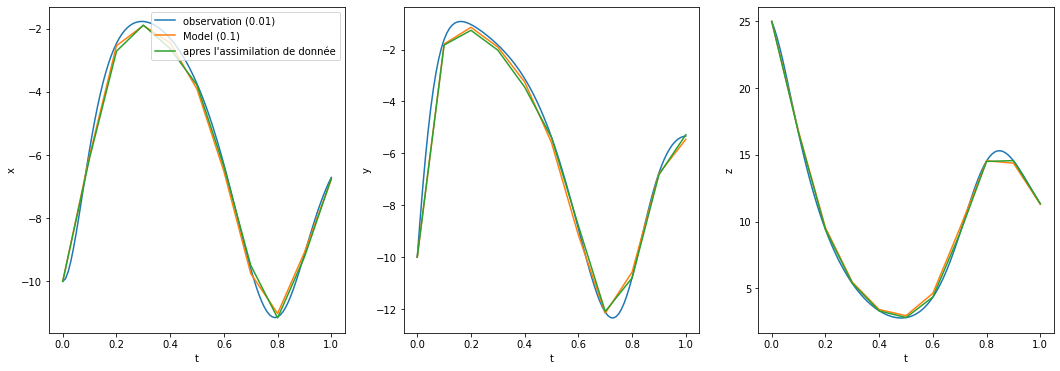

In [30]:
def hx_z(x):
   return np.array([x[2]])



R_z = np.eye(1)*0.01 

def read_sensor_z(index):
    return np.array([lorenz1[2][index]])



tab_z,tab_temps,tab_cov_z=assimilation_donnée(x,read_sensor_z,P,Q,R_z,T,1,dt,N,40,hx_z,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_z)



## Data assimilation with different parameters for the Lorenz System

In [31]:
γ=(12.,6.,12.) #(σ,b,r)
X0_obs=np.array([-10.,10.,25.]) 

T=4
dt=0.01
N=int(T/dt)


In [32]:
lorenz1=RK4_Lorenz(γ,X0_obs,N,T)

In [33]:
γ2=(10.,6.,10.) #(σ,b,r)
X0=np.array([-10.,10.,25.]) 

T=4
dt=0.1
N=int(T/dt)

In [34]:
lorenz2=RK4_Lorenz(γ2,X0,N,T)

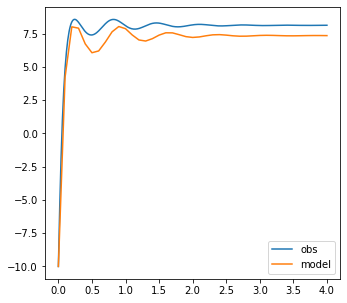

In [35]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz1[3],lorenz1[0],label="obs")
ax1.plot(lorenz2[3],lorenz2[0],label="model")
ax1.legend()

### Observation of the 3 components x,y,z

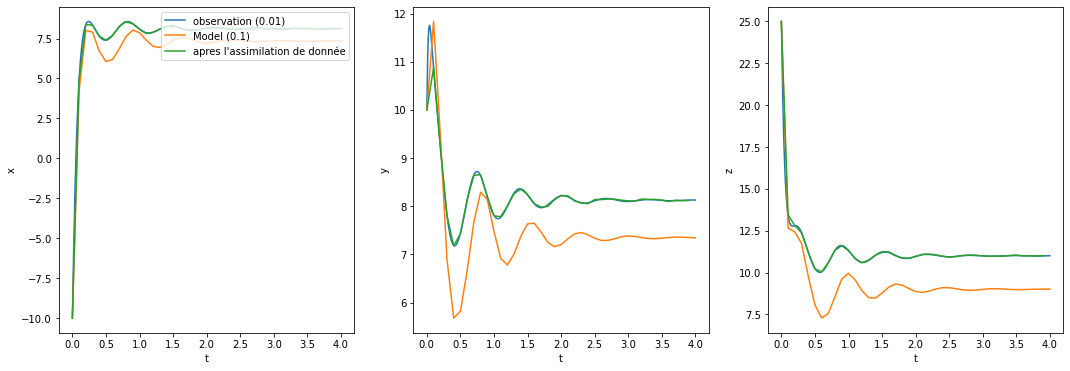

In [36]:
def hx(x):
   return x

R= np.eye(3)*0.01  
Q=np.eye(3)*0.1
P = np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])
N_=10
tab,tab_temps,tab_cov_model=assimilation_donnée(X0,read_sensor,P,Q,R,T,3,dt,N_,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)


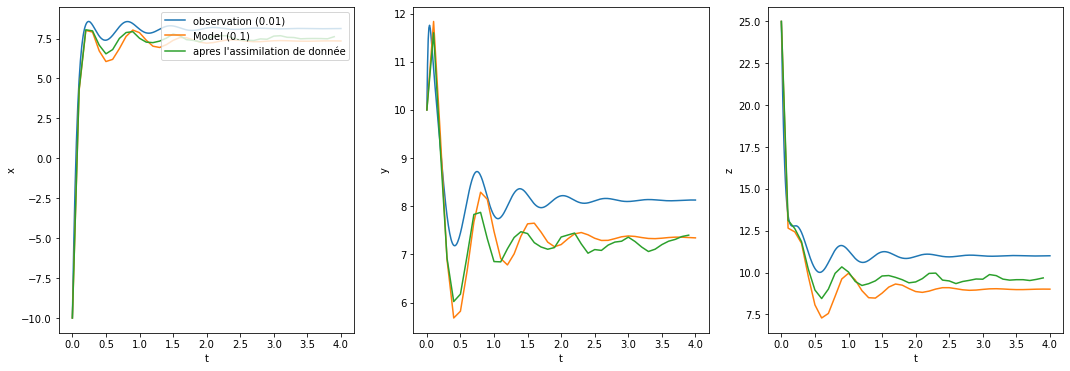

In [37]:
def hx(x):
   return x

R= np.eye(3)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,3,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)


### Observation only of the component x

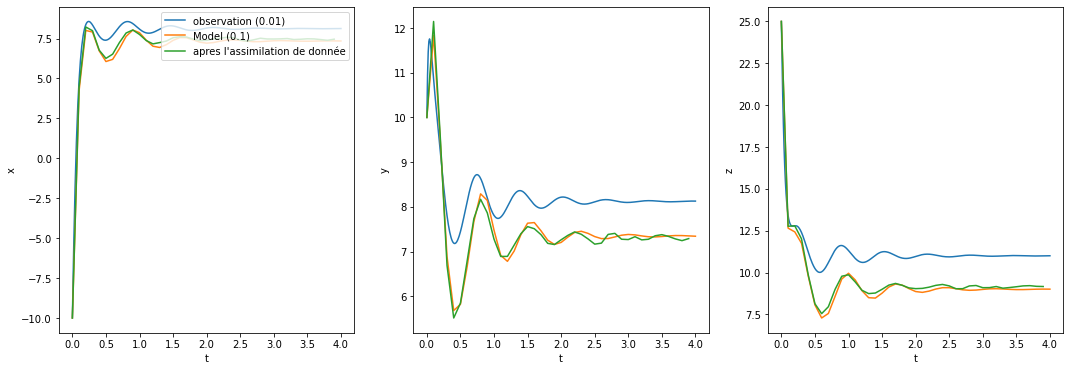

In [38]:
def hx(x):
   return [x[0]]

R= np.eye(1)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[0][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,1,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)


### Observation only of the component x y

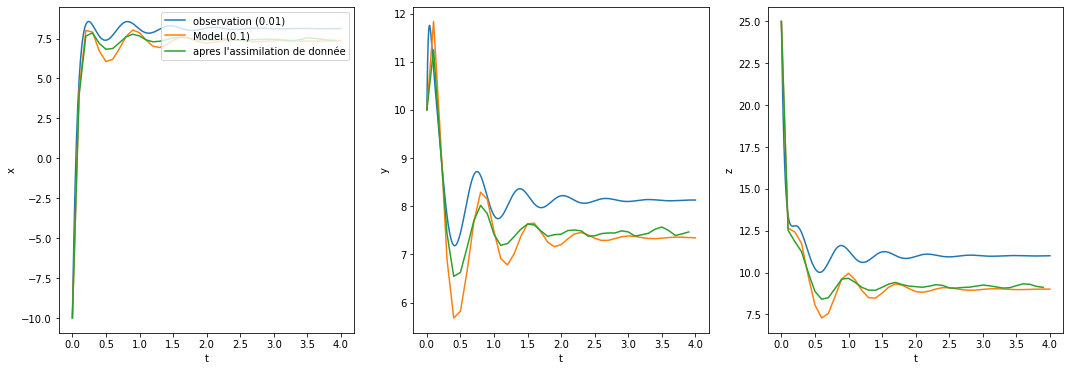

In [39]:
def hx(x):
   return [x[1]]

R= np.eye(1)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[1][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,1,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)


### Observation only of the component x z

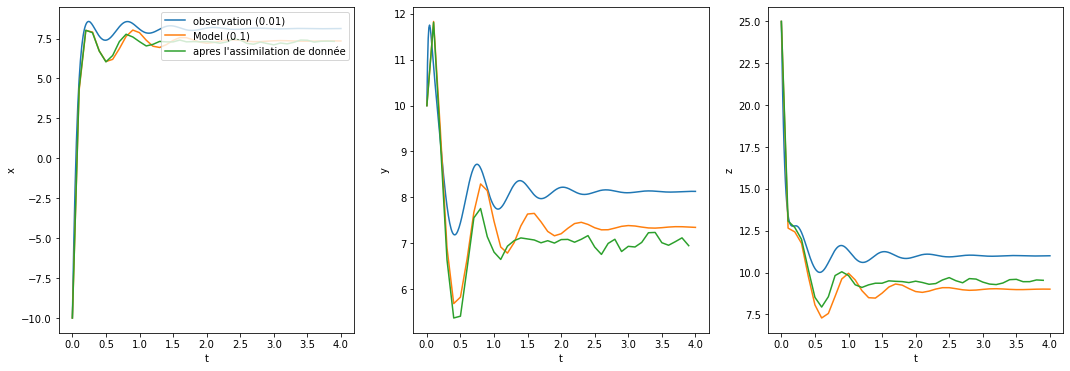

In [40]:
def hx(x):
   return [x[2]]

R= np.eye(1)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[2][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,1,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)
